In [1]:
#テキストファイルでパイナップルの(頂点+色)を取得
#maisuごとにDCT、IDCTする
#32bit演算
#YCbCrでPSNR計算してる→ひとまずYCbCrでやる

In [3]:
#量子化テーブルの作成
import numpy as np

bairituY = 4
bairituR = 5
bairituG = 1
bairituB = 1
dc = 64

# tableY = np.zeros((8,8))
# ryoshi_Y = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
# [ 12,  12,  14,  19,  26,  58,  60,  55 ],
# [ 14,  13,  16,  24,  40,  57,  69,  56 ],
# [ 14,  17,  22,  29,  51,  87,  80,  62 ],
# [ 18,  22,  37,  56,  68, 109, 103,  77 ],
# [ 24,  35,  55,  64,  81, 104, 113,  92 ],
# [ 49,  64,  78,  87, 103, 121, 120, 101 ],
# [ 72,  92,  95,  98, 112, 100, 103,  99 ]])

# tableY = (ryoshi_Y*bairituY).astype(np.int32)
# tableY[tableY < 1] = 1
# print(tableY)

#2の倍数のみバージョン
tableY = np.zeros((8,8))
ryoshi_Y = np.array([[dc,  8,  8,  16,  32,  32,  64,  64 ],
[ 16,  16,  16,  16,  32,  64,  64,  64 ],
[ 16,  16,  16,  32,  32,  64,  64,  64 ],
[ 16,  16,  16,  32,  64,  64,  64,  64 ],
[ 16,  16,  32,  64,  64, 128, 128,  64 ],
[ 32,  32,  64,  64,  64, 128, 128,  128 ],
[ 64,  64,  64,  64, 128, 128, 128, 128 ],
[ 64,  128,  128,  128, 128, 128, 128,  128 ]])

tableY = (ryoshi_Y*bairituY).astype(np.int32)
tableY[tableY < 1] = 1
print(tableY)

tableR = np.zeros((8,8))
ryoshi_R = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableR = (ryoshi_R*bairituR).astype(np.int32)
tableR[tableR < 1] = 1
print(tableR)

tableG = np.zeros((8,8))
ryoshi_G = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableG = (ryoshi_G*bairituG).astype(np.int32)
tableG[tableG < 1] = 1
print(tableG)

tableB = np.zeros((8,8))
ryoshi_B = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableB = (ryoshi_B*bairituB).astype(np.int32)
tableB[tableB < 1] = 1
print(tableB)


[[256  32  32  64 128 128 256 256]
 [ 64  64  64  64 128 256 256 256]
 [ 64  64  64 128 128 256 256 256]
 [ 64  64  64 128 256 256 256 256]
 [ 64  64 128 256 256 512 512 256]
 [128 128 256 256 256 512 512 512]
 [256 256 256 256 512 512 512 512]
 [256 512 512 512 512 512 512 512]]
[[320  55  50  80 120 200 255 305]
 [ 60  60  70  95 130 290 300 275]
 [ 70  65  80 120 200 285 345 280]
 [ 70  85 110 145 255 435 400 310]
 [ 90 110 185 280 340 545 515 385]
 [120 175 275 320 405 520 565 460]
 [245 320 390 435 515 605 600 505]
 [360 460 475 490 560 500 515 495]]
[[ 64  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[ 64  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56

In [1]:
#DCT
import numpy as np

def proposed_stage_1(x):
    X = np.zeros((8,))
    X[0] = x[0] + x[7]
    X[1] = x[1] + x[6]
    X[2] = x[2] + x[5]
    X[3] = x[3] + x[4]
    X[4] = x[3] - x[4]
    X[5] = x[2] - x[5]
    X[6] = x[1] - x[6]
    X[7] = x[0] - x[7]
    return X

def proposed_stage_2(x):
    X = np.copy(x)
    X[0] = x[0] + x[3]
    X[1] = x[1] + x[2]
    X[2] = x[1] - x[2]
    X[3] = x[0] - x[3]
    return X

def proposed_stage_3(x):
    X = np.copy(x)
    X[0] = x[0] + x[1]
    X[4] = x[0] - x[1]
    X[6] = -x[2]
    X[2] = x[3]
    X[5] = x[4]
    X[7] = x[5]
    X[1] = x[6]
    X[3] = x[7]
    return X

def proposed_stage_1_inverse(X):
    x = np.zeros((8,))
    x[0] = 0.5 * (X[0] + X[7]).astype(np.int32)
    x[1] = 0.5 * (X[1] + X[6]).astype(np.int32)
    x[2] = 0.5 * (X[2] + X[5]).astype(np.int32)
    x[3] = 0.5 * (X[3] + X[4]).astype(np.int32)
    x[4] = 0.5 * (X[3] - X[4]).astype(np.int32)
    x[5] = 0.5 * (X[2] - X[5]).astype(np.int32)
    x[6] = 0.5 * (X[1] - X[6]).astype(np.int32)
    x[7] = 0.5 * (X[0] - X[7]).astype(np.int32)
    return x

def proposed_stage_2_inverse(X):
    x = np.copy(X)
    x[0] = 0.5 * (X[0] + X[3]).astype(np.int32)
    x[1] = 0.5 * (X[1] + X[2]).astype(np.int32)
    x[2] = 0.5 * (X[1] - X[2]).astype(np.int32)
    x[3] = 0.5 * (X[0] - X[3]).astype(np.int32)
    return x

def proposed_stage_3_inverse(X):
    x = np.copy(X)
    x[0] = 0.5 * (X[0] + X[4]).astype(np.int32)
    x[1] = 0.5 * (X[0] - X[4]).astype(np.int32)
    x[2] = -X[6]
    x[3] = X[2]
    x[4] = X[5]
    x[5] = X[7]
    x[6] = X[1]
    x[7] = X[3]
    return x

def DCT1(x):
    X_1 = proposed_stage_1(x)
    X_2 = proposed_stage_2(X_1)
    X_3 = proposed_stage_3(X_2)
    return X_3

def IDCT1(X_3):
    X_2 = proposed_stage_3_inverse(X_3)
    X_1 = proposed_stage_2_inverse(X_2)
    x = proposed_stage_1_inverse(X_1)
    return x

def tenchi2D(x):
    x = np.transpose(x)
    return x

def DCT_2D(x):
    X_out1 = np.zeros((8,8))
    X_out2 = np.zeros((8,8))
    for i in range(8):
        X_out1[i] = DCT1(x[i])
    X_out1 = tenchi2D(X_out1)
    for i in range(8):
        X_out2[i] = DCT1(X_out1[i])
    return X_out2
    
def IDCT_2D(X_out2):
    X_out1 = np.zeros((8,8))
    x = np.zeros((8,8))
    for i in range(8):
        X_out1[i] = IDCT1(X_out2[i])
    #転置
    X_out1 = tenchi2D(X_out1)
    # ｘ方向
    for i in range(8):
        x[i] = IDCT1(X_out1[i])
    return x

564
[[234. 255. 219. 255. 240. 122. 113. 184.]
 [215. 125.  62. 101. 184.  71. 122.  73.]
 [250. 125. 255. 221. 248. 212. 241. 255.]
 [255. 243. 224. 157.  77. 171.  57.  56.]
 [ 67.  60. 196. 149.  59. 218. 152. 108.]
 [152. 117.  64.  54.  60.  68. 159. 184.]
 [ 84.  80. 228. 158. 200. 221. 225. 233.]
 [224. 123.  75. 251. 184. 156.  82.  79.]]


最も多い要素数を持つ8x8配列のインデックス: 159
0でない要素の数: 29
[[243 231 159 275 243 159 119 179]
 [202 122  74 130 162  74 122  74]
 [246 166 214 174 206 214 230 246]
 [157 233 193 141 109 193  57  93]
 [141  89 177 125  93 177 169  77]
 [150  70 118  78 110 118 134 150]
 [ 98  82 226 154 186 226 210 226]
 [187 143 103 219 187 103  95 123]]
9841.0
10051.0
10259.0


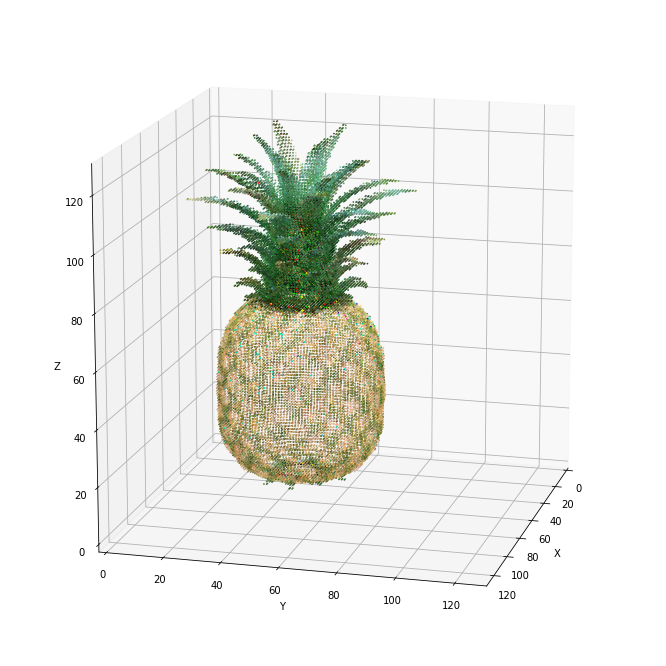

In [4]:
#表示
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

seikika = 1

nonzeroY = np.array([])
nonzeroCr = np.array([])
nonzeroCb = np.array([])

vertex_color = np.loadtxt('path_vertex_color.txt')
colors = vertex_color[:,3:6]
dot = colors.shape[0]

#成分の入れ替え
colors_BGR = colors[:, ::-1]
#正規化
colors_BGR = colors_BGR / seikika


#枚数を計算
maisu = dot//64 + 1
print(maisu)

#最後の枚数の足りていない部分を最後の色の値で埋める
anaume_kosu = (maisu*64)-dot
anaume_atai = colors_BGR[dot-1]
anaume = np.ones((anaume_kosu,3))*anaume_atai
colors_BGR = np.concatenate([colors_BGR, anaume], 0)

# #枚ごとのDCTを入れる配列
# DCT_package = np.zeros((maisu,8,8,3))
# colors_add = np.zeros((64,3))
# colors_BGR = np.concatenate([colors_BGR, colors_add], 0).astype(np.uint8)

#発光デバイスを8*8ごとに分割
colors88 = np.zeros((maisu,8,8,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors88[m,i,j] = colors_BGR[k]
            k = k + 1

# #データ形式をuint8に変換
# colors88 = colors88.astype(np.uint8)

#要素ごとに分割、正規化
# for i in range(maisu):
#     colors88[i,:,:,:] = cv2.cvtColor(colors88[i,:,:,:], cv2.COLOR_BGR2YCrCb)
Y = colors88[:,:,:,0].astype(np.float16)
Cr = colors88[:,:,:,1].astype(np.float16)
Cb = colors88[:,:,:,2].astype(np.float16)

print(Cb[4,:,:])

#変換，量子化
for i in range(maisu):
    Y[i,:,:] = DCT_2D(Y[i,:,:])
    Cr[i,:,:] = DCT_2D(Cr[i,:,:])
    Cb[i,:,:] = DCT_2D(Cb[i,:,:])
    Y[i,:,:] = Y[i,:,:]/tableY
    Cr[i,:,:] = Cr[i,:,:]/tableY
    Cb[i,:,:] = Cb[i,:,:]/tableY
    Y[i,:,:] = Y[i,:,:].astype(np.int32)
    Cr[i,:,:] = Cr[i,:,:].astype(np.int32)
    Cb[i,:,:] = Cb[i,:,:].astype(np.int32)

    nonzeroY = np.append(nonzeroY, (np.count_nonzero(Y[i,:,:])))
    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(Cr[i,:,:])))
    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(Cb[i,:,:])))

#ここからは整数しか使えない
Y = Y.astype(np.int32)
Cr = Cr.astype(np.int32)
Cb = Cb.astype(np.int32)

#print(Y[1,:,:])

non_zero_counts = np.count_nonzero(Y, axis=(1, 2))
max_index = np.argmax(non_zero_counts)
max_non_zero_count = non_zero_counts[max_index]
print("最も多い要素数を持つ8x8配列のインデックス:", max_index)
print("0でない要素の数:", max_non_zero_count)

#復元
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*tableY
    Cr[i,:,:] = Cr[i,:,:]*tableY
    Cb[i,:,:] = Cb[i,:,:]*tableY

#print(Y[1])

for i in range(maisu):
    """if i == 1:
        print(Y[i,:,:])
        print(Cr[i,:,:])
        print(Cb[i,:,:])"""
    Y[i,:,:] = IDCT_2D(Y[i,:,:])
    Cr[i,:,:] = IDCT_2D(Cr[i,:,:])
    Cb[i,:,:] = IDCT_2D(Cb[i,:,:])

Y = Y * seikika
Cr = Cr * seikika
Cb = Cb * seikika

Y[Y>255] = 255
Cr[Y>255] = 255
Cb[Y>255] = 255
Y[Y<0] = 0
Cr[Y<0] = 0
Cb[Y<0] = 0

Y_recrypt = Y.astype(np.uint8)
Cr_recrypt = Cr.astype(np.uint8)
Cb_recrypt = Cb.astype(np.uint8) 

print(Cb[4])

#print(Y_recrypt)

colors88_recrypt = np.stack([Y_recrypt, Cr_recrypt, Cb_recrypt],-1)

# #BGRに変換(ここで乗算が必要になる)
# for i in range(maisu):
#     colors88_recrypt[i,:,:,:] = cv2.cvtColor(colors88_recrypt[i,:,:,:], cv2.COLOR_YCrCb2BGR)

#8*8から一列に
colors_BGR_recrypt = np.zeros((dot + 64,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors_BGR_recrypt[k] = colors88_recrypt[m,i,j]
            k = k + 1

#表示できるように
colors_RGB_recrypt = colors_BGR_recrypt[:, ::-1]
colors_RGB_recrypt = colors_RGB_recrypt[0:dot, :]
colors_RGB_recrypt = colors_RGB_recrypt.astype(np.int32)
vertex = vertex_color[:,0:3].astype(np.int32)
vertex_colors_recrypt = np.concatenate([vertex, colors_RGB_recrypt], -1)
colors_recrypt = vertex_colors_recrypt[:,3:6]
colors_recrypt_seikika = colors_recrypt/255

print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))

#像の表示
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
ax.scatter(vertex_colors_recrypt[:,0], vertex_colors_recrypt[:,1], vertex_colors_recrypt[:,2], s = 0.5, c = colors_recrypt_seikika, alpha =1)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

#逆の操作をして元の配列に色を戻して表示する
#DCT量子化後の配列の０でない要素の値の数を調べる

In [1]:
import matplotlib
print(matplotlib.__version__)

3.7.2
